In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii

In [71]:
# select most recent training data
train_file = 'training_data_0802.pk' # training data with 3 classes
train_file = 'training_data_1702.pk' # training data with only gcs and galaxies
#train_file = 'training_data_1902_with_stars.pk' # training data with gcs galaxies and stars, classed as 'gc' and 'non-gc'

# load training data and filter out stars
with open(f'./pickle/training_data/{train_file}','rb') as f:
    training_data = pickle.load(f)

In [24]:
bounds = pickle.load(open('./pickle/bounds.pk','rb'))
master_cat = pd.read_csv('./catdata/master_catalog_jan_2023.csv') #2184 objects long
cat_files = ['cat1_50.pk','cat51_100.pk','cat101_150.pk','cat151_200.pk','cat201_235.pk',
             'cat236_257.pk','cat258_279.pk','cat280_320.pk','cat321_360.pk','cat361_406.pk']
def load_cat(field): # change to match-case
    bounds = [50,100,150,200,235,257,279,320,360,406]
    for b in range(len(bounds)):
        if field <= bounds[b]:
            to_load = cat_files[b]
            break
    with open(f'./pickle/{to_load}','rb') as f:
        catalogue = pickle.load(f)
    return catalogue[field] # 26/02 changed to return only the selected field

## 26/02/23 Defining useful functions
Functions for finding mid points of fields etc. to help with catalog matching

In [70]:
# find the mid point of a given field (returns a 2-tuple of coordinates)
# note: bounds file has already taken into account the 0 RA issue and holds negative values, rather than e.g. RA=358
def find_middle(field: int) -> tuple:
    field_bounds = bounds[field]
    ra_width = abs( field_bounds[0]-field_bounds[1] )/2
    dec_width = abs( field_bounds[2]-field_bounds[3] )/2
    ra_mid = field_bounds[1]+ra_width
    dec_mid = field_bounds[2]+dec_width
    return (ra_mid,dec_mid)

In [45]:
# returns true if a given point is found to be within a specified field
# takes a 2-tuple: (ra,dec) in degrees
def is_in_field(field: int, point: tuple) -> bool:
    ra1,ra2,dec1,dec2 = bounds[field]
    ra,dec=point
    return ra2<ra<ra1 and dec1<dec<dec2

### Get list of required fields to get 2MASS data in

In [112]:
req_fields = set(training_data['field'])

In [115]:
middles=[]
for f in req_fields:
    middles.append((f,find_middle(f)))

In [119]:
middles

[(5, (23.464899999999997, 28.6629625)),
 (11, (11.761116666666664, 29.352430555555557)),
 (13, (24.56057291666666, 29.64395)),
 (14, (23.461756249999997, 29.662684722222224)),
 (20, (13.460004166666668, 30.31201527777778)),
 (22, (11.260622916666664, 30.35194166666667)),
 (24, (24.561662499999997, 30.643506944444447)),
 (25, (25.658972916666663, 30.67221111111111)),
 (33, (16.56076458333333, 31.229052777777774)),
 (35, (14.561231249999999, 31.292294444444444)),
 (37, (11.211985416666666, 31.34112916666667)),
 (43, (23.90592291666666, 31.363145833333334)),
 (52, (16.811329166666667, 32.200918055555555)),
 (58, (24.008899999999997, 32.29212916666667)),
 (62, (11.017320833333333, 32.343831944444446)),
 (70, (18.89793125, 33.096337500000004)),
 (80, (13.178737499999997, 33.29931666666667)),
 (82, (12.0115625, 33.31777777777778)),
 (84, (10.837060416666667, 33.324225000000006)),
 (85, (19.83953958333333, 33.50277222222222)),
 (91, (17.753181249999997, 34.104534722222226)),
 (92, (3.54242083

In [121]:
with open('./pickle/middles.txt','w') as f:
    for i in middles:
        f.writelines(str(i)+'\n')

## #####

In [35]:
master_cat[master_cat['CLASS'].isin([1,4,8])] # GCs, galaxies, and extended clusters

,ID,RADEG,DECDEG,CLASS,DATATABLE
1,2M034,0.508375,51.606722,4.0,m31rbcV5
2,PAndAS-03,0.985042,40.888667,1.0,huxor14_table1
3,PAndAS-04,1.178875,47.361797,1.0,huxor14_table1
4,PAndAS-05,1.350625,43.926583,1.0,huxor14_table1
5,2M035,1.549625,41.503722,4.0,m31rbcV5
...,...,...,...,...,...
2658,LAMOST-C19,26.137480,30.748610,4.0,NaN
2661,SDSS17a,355.458333,44.835278,1.0,di_tullio_zinn_13_table1
2665,SDSS18,357.290417,40.458333,4.0,di_tullio_zinn_13_table1
2666,PAndAS-01,359.300125,43.552300,1.0,huxor14_table1


In [123]:
cat5 = load_cat(5)

In [157]:
field=5
_2MASS_table = ascii.read(f'./catdata/2mass/{field}.tbl', format='ipac')

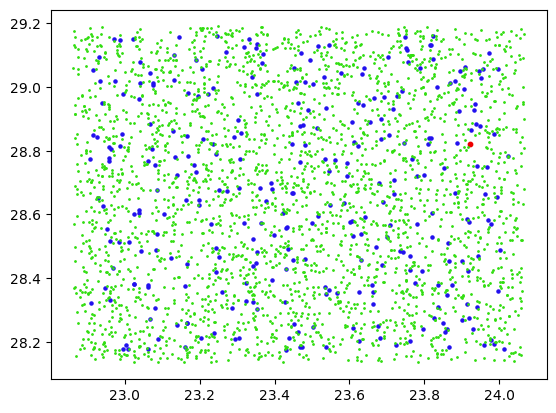

In [158]:
plt.scatter(cat5[::500]['RA'],cat5[::500]['Dec'],c='#2211ee',s=5)
plt.scatter(training_data[training_data['field']==5]['ra'],training_data[training_data['field']==5]['dec'],c='#ee0000',s=10)
plt.scatter(_2MASS_table['ra'],_2MASS_table['dec'],c='#32de11',s=1)

# 2MASS Catalogue matching

In [1]:
# match objects from 2MASS to pandas
# take ra dec from 2mass and match to ra dec in pandas
# find all close matches (<0.01deg??)
# add chosen filter to data
def match_2mass_pandas():
    return 0

In [ ]:
# match 2mass to master nbc cat
def match_2mass_master(tbl_2mass):
    
    return 0

In [ ]:
# match objects in CAT[n] to the ones in master_cat
# matches every object from CAT[n] so the resulting arrays are len(CAT[n]) long
def match_objs(cat_no: int) -> (np.ndarray, np.ndarray):
    d1 = CAT[cat_no]
    ra_obs, dec_obs = d1['RA'], d1['Dec']
    d2 = master_cat
    ra_qry, dec_qry = d2['RADEG'], d2['DECDEG']

    c1 = coord.SkyCoord(ra_obs, dec_obs, unit=(u.degree, u.degree))
    c2 = coord.SkyCoord(ra_qry, dec_qry, unit=(u.degree, u.degree))
    idx, d2d, _ = c1.match_to_catalog_sky(c2)
    return idx,d2d #idx: the index of the object in RBC, d2d: distance to that object from CAT